# Project: Investigate a Gapminder dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will use 5 datasets from Gapminder. I need to explore the Human development index progress in the world and how it is related to the population in each country as well as how it is related to the value of imports and exports.
The following datasets where used:
1. total_gdp_us_inflation_adjusted
2. population_total
3. exports_percent_of_gdp
4. imports_percent_of_gdp
5. hdi_human_development_index

The question needs to be answered are:
1. how the Human development Index is correlated to the selected measures
2. For the positively correlated measure if any how this correlation is changed by country

### The original data is from "https://www.gapminder.org/data/"

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
While exploring the datasets. I found that I need to reach an intermediate dataset which has the following characteristics:
1. It has the columns (country, year, HDI , Population, GDP, Imports and exports)
2. All numbers in this dataset are real numbers without any noise (like Mega, Tera, Kilo or billion symbols)
3. The data are stacked and not cross-tab as introduced from Gapminder 

The following two functions where created for the second and third items above

In [2]:
# Used Functions to clean the data

def CNV_to_NUM(df):
    '''
    This function is to process a dataframe column by column and convert each column values from string to numbers.
    It assumes that the numbers are written in an abbreviated format. In the following I will mention the treated formats exactly.
    1-'k' which means 1000
    2-'B' which means 1000000000
    3-'M' which means 1000000
    4-'TR' which means 1000000000000 'I used float64 to avoid casting wrong trillion numbers'
    The returned data frame processed columns shall be of type Float64
    The function assume the received dataframe is organized in the following way.
    first column is of any type and from second to the final column it is of the format we need to convert
    :param df:
    :return: modified df
    '''
    for col in df.columns[1:len(df.columns) + 1]:  # to work on all columns except the first one

            df[col]=df[col].apply(str) # make sure that any column even int or float is of type string before processing
            df[col] = (df[col].str.replace('−','-')) # to treat the case of non regular minus sign in some data
            df[col] = (df[col].replace(r'[kBMTR]+$', '', regex=True).astype('float64') * df[col].str.extract(
                r'[\d\.]+([kBMTR]+)', expand=False).fillna(1).replace(['k', 'M', 'B', 'TR'], [10 ** 3, 10 ** 6, 10 ** 9, 10 ** 12]).astype('float64'))

    return df

def CNV_to_Stack(df,col_name):
    '''
    This function convert a dataframe in the format of index,country, year1, year2 ....., year n
    into a tidy dataframe in the format of country,year and value where the header of the value column named
    from parameter col_name
    :param df, col_name:
    :return modified df:
    '''
    Ser = (df.set_index("country")).stack()
    new_df = pd.DataFrame(Ser, index=Ser.index, columns=[col_name])
    new_df.index.names = ('country', 'year')
    return new_df


### Data Cleaning (convert to numbers, stack and merge dataframe)
In this step I will use the above defined functions with Pandas dataframe merge function to reach the intermediate goal of a having one dataframe that has all the cleaned data. The next steps will be:
1. Download and define the needed file names
2. Clean how the numbered data are written in each dataframe
3. Stack the dataframe in a format (country, year) -> value
4. Merge the dataframes in the HDI dataframe to have all the the other data linked in the final intermediate dataframe

       hdi_human_development_index
count                  4964.000000
mean                      0.656419
std                       0.165961
min                       0.189000
25%                       0.529000
50%                       0.681000
75%                       0.787250
max                       0.954000


119

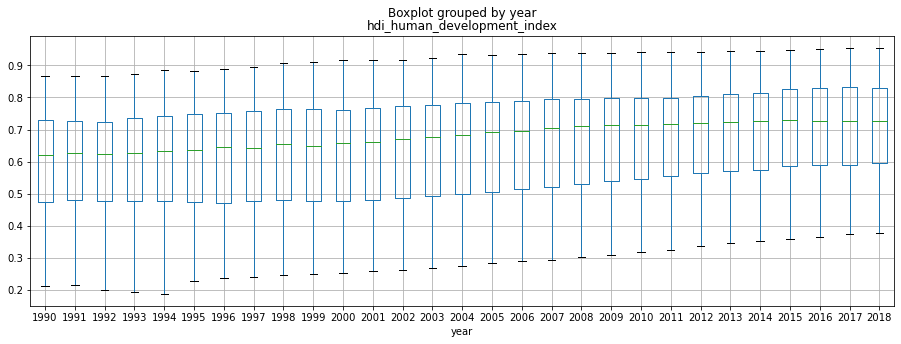

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
file_name_GDP="total_gdp_us_inflation_adjusted.csv"
file_name_PPU="population_total.csv"
file_name_EXP="exports_percent_of_gdp.csv"
file_name_IMP="imports_percent_of_gdp.csv"
file_name_HDI="hdi_human_development_index.csv"

# read build, clean the HDI dataframe and leave it for next steps
df_HDI = pd.read_csv(file_name_HDI)
df_HDI_NUM_STK= CNV_to_Stack(CNV_to_NUM(df_HDI),file_name_HDI.split(".")[0])
df_HDI_NUM_STK.boxplot(column=(file_name_HDI.split(".")[0]),by='year',figsize=(15,5))
print(df_HDI_NUM_STK.describe())
del df_HDI
gc.collect()



In [4]:
# read build and clean the population dataframe and merge it with HDI dataframe
df_PPU = pd.read_csv(file_name_PPU)
df_PPU_NUM_STK= CNV_to_Stack(CNV_to_NUM(df_PPU),file_name_PPU.split(".")[0])
print(df_PPU_NUM_STK.describe())
df_HDI_NUM_STK = df_HDI_NUM_STK.merge(df_PPU_NUM_STK,left_on=df_HDI_NUM_STK.index.names,right_on=df_PPU_NUM_STK.index.names,how='left')
del [df_PPU,df_PPU_NUM_STK]
gc.collect()



       population_total
count      5.929700e+04
mean       2.312308e+07
std        1.002205e+08
min        6.450000e+02
25%        4.250000e+05
50%        2.630000e+06
75%        1.080000e+07
max        1.650000e+09


21176

In [5]:
# read build and clean the GDP dataframe and merge it with HDI dataframe
df_GDP = pd.read_csv(file_name_GDP)
df_GDP_NUM_STK= CNV_to_Stack(CNV_to_NUM(df_GDP),file_name_GDP.split(".")[0])
print(df_GDP_NUM_STK.describe())
df_HDI_NUM_STK = df_HDI_NUM_STK.merge(df_GDP_NUM_STK,left_on=df_HDI_NUM_STK.index.names,right_on=df_GDP_NUM_STK.index.names,how='left')
del [df_GDP,df_GDP_NUM_STK]
gc.collect()



       total_gdp_us_inflation_adjusted
count                     9.528000e+03
mean                      2.511934e+11
std                       1.046121e+12
min                       2.140000e+07
25%                       3.750000e+09
50%                       1.505000e+10
75%                       1.100000e+11
max                       1.830000e+13


353

In [6]:
# read build and clean the imports dataframe and merge it with HDI dataframe
df_IMP = pd.read_csv(file_name_IMP)
df_IMP_NUM_STK= CNV_to_Stack(CNV_to_NUM(df_IMP),file_name_IMP.split(".")[0])
print(df_IMP_NUM_STK.describe())
df_HDI_NUM_STK = df_HDI_NUM_STK.merge(df_IMP_NUM_STK,left_on=df_HDI_NUM_STK.index.names,right_on=df_IMP_NUM_STK.index.names,how='left')
del [df_IMP,df_IMP_NUM_STK]
gc.collect()



       imports_percent_of_gdp
count             8504.000000
mean                42.269851
std                 28.219226
min                  0.000000
25%                 24.000000
50%                 35.300000
75%                 53.900000
max                428.000000


353

In [7]:
# read build and clean the exports dataframe and merge it with HDI dataframe
df_EXP = pd.read_csv(file_name_EXP)
df_EXP_NUM_STK= CNV_to_Stack(CNV_to_NUM(df_EXP),file_name_EXP.split(".")[0])
print(df_EXP_NUM_STK.describe())
df_HDI_NUM_STK = df_HDI_NUM_STK.merge(df_EXP_NUM_STK,left_on=df_HDI_NUM_STK.index.names,right_on=df_EXP_NUM_STK.index.names,how='left')
del [df_EXP,df_EXP_NUM_STK]
gc.collect()


       exports_percent_of_gdp
count             8495.000000
mean                36.541427
std                 28.780637
min                  0.005380
25%                 18.200000
50%                 29.400000
75%                 46.600000
max                433.000000


381

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4964 entries, ('Afghanistan', '1990') to ('Zimbabwe', '2018')
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hdi_human_development_index      4964 non-null   float64
 1   population_total                 4964 non-null   float64
 2   total_gdp_us_inflation_adjusted  4777 non-null   float64
 3   imports_percent_of_gdp           4508 non-null   float64
 4   exports_percent_of_gdp           4508 non-null   float64
dtypes: float64(5)
memory usage: 215.4+ KB


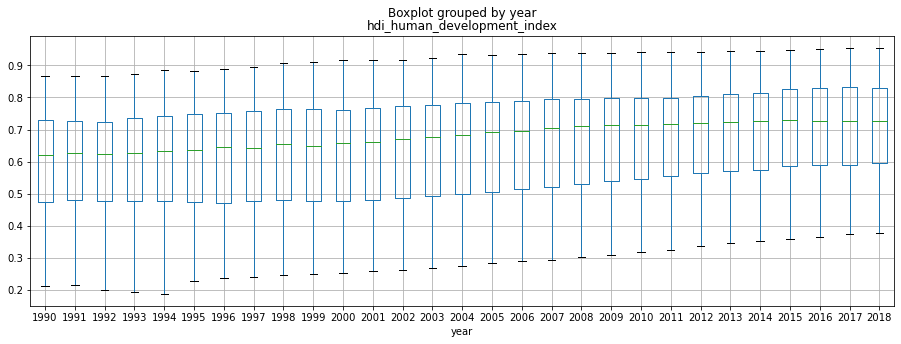

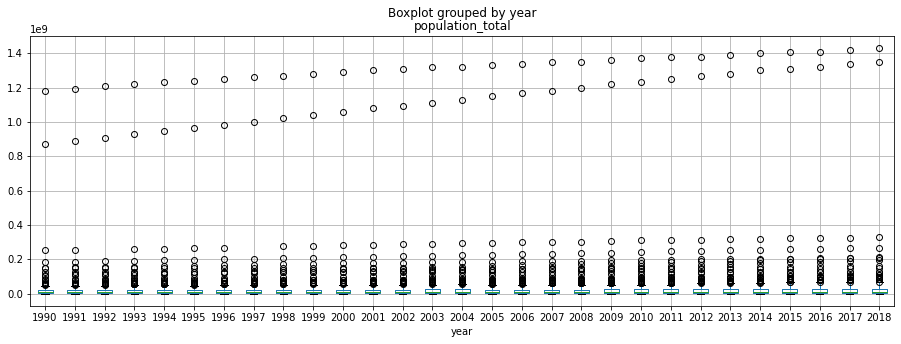

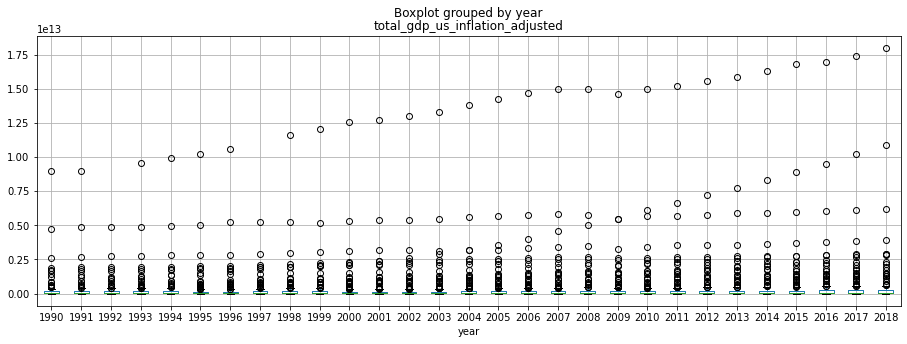

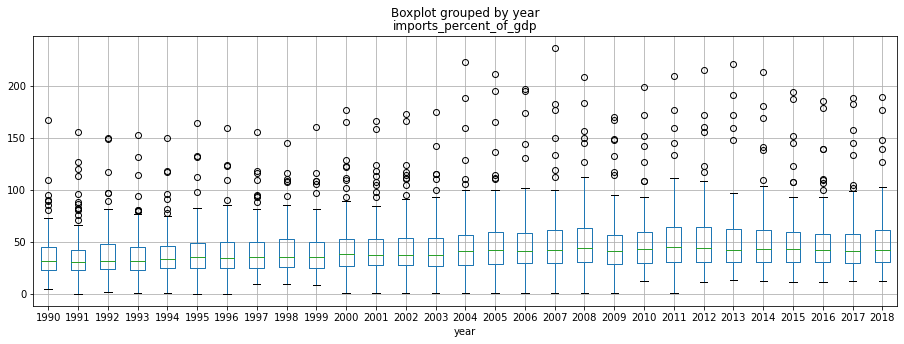

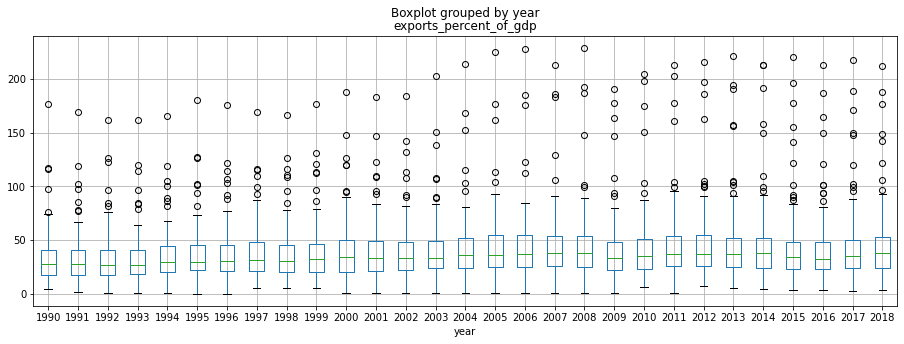

In [8]:
df_HDI_NUM_STK.to_csv("Backup_BeforeRemovingIncompleteCountries.csv")
df_HDI_NUM_STK.info()
# print(df_HDI_NUM_STK.describe())
for col in df_HDI_NUM_STK.columns:
    df_HDI_NUM_STK.boxplot(column=col, by='year', figsize=(15,5))
# now the dataframe "df_HDI_NUM_STK" is rady for next steps

In [9]:
#Further remove na or empty records
df_HDI_NUM_STK.dropna(inplace=True)
df_HDI_NUM_STK.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4453 entries, ('Angola', '2000') to ('Zimbabwe', '2018')
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hdi_human_development_index      4453 non-null   float64
 1   population_total                 4453 non-null   float64
 2   total_gdp_us_inflation_adjusted  4453 non-null   float64
 3   imports_percent_of_gdp           4453 non-null   float64
 4   exports_percent_of_gdp           4453 non-null   float64
dtypes: float64(5)
memory usage: 193.9+ KB


In [10]:
#remove country which is having incomplete rows
max_num_records = max(df_HDI_NUM_STK.groupby("country").count().max())
df_countries_to_be_removed = df_HDI_NUM_STK.groupby("country").count() < max_num_records
df_countries_to_be_removed['Selected']= df_countries_to_be_removed['hdi_human_development_index'] & df_countries_to_be_removed['population_total'] & df_countries_to_be_removed['total_gdp_us_inflation_adjusted'] & df_countries_to_be_removed['imports_percent_of_gdp'] & df_countries_to_be_removed['exports_percent_of_gdp'] 
df_clean=df_HDI_NUM_STK.drop(df_countries_to_be_removed.query('Selected == True').index)
print("Removed Countries are {} countries and they are: ".format(len(df_countries_to_be_removed.query('Selected == True'))))
print(df_countries_to_be_removed.query('Selected == True').index.values)
df_clean.to_csv('BackupCleanData.csv')

Removed Countries are 71 countries and they are: 
['Angola' 'Antigua and Barbuda' 'Azerbaijan' 'Bahamas' 'Belarus' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Cape Verde'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Croatia' 'Dominica'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Georgia' 'Grenada'
 'Guinea-Bissau' 'Guyana' 'Hungary' 'Iceland' 'Israel' 'Kazakhstan'
 'Kiribati' 'Kuwait' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Madagascar' 'Maldives' 'Marshall Islands'
 'Micronesia, Fed. Sts.' 'Moldova' 'Montenegro' 'Mozambique' 'Myanmar'
 'Nigeria' 'North Macedonia' 'Oman' 'Palau' 'Palestine' 'Papua New Guinea'
 'Poland' 'Qatar' 'Samoa' 'Serbia' 'Seychelles' 'Slovak Republic'
 'Slovenia' 'Solomon Islands' 'South Sudan'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Timor-Leste'
 'Turkmenistan' 'United Arab Emirates' 'United States' 'Uzbekistan'
 'Vanuatu' 'Venezuela' 'Zambia']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Above you will find the final cleaning step which is removing the countries with incomplete data. Names of the countries are listed.

## Exploratory Data Analysis

### Research Question 1 "How the Human development Index is correlated to the selected measures"
By exploring this question, we are are trying to know how countries succeed in advancing their HDI, shall they limit population, shall they increase their GDP, shall they boost their imports or exports to advance in HDI.

,hdi_human_development_index,population_total,total_gdp_us_inflation_adjusted,imports_percent_of_gdp,exports_percent_of_gdp
hdi_human_development_index,0.0,-0.042673,0.327535,0.274232,0.405600
population_total,0.0,0.000000,0.502664,-0.183603,-0.138394
total_gdp_us_inflation_adjusted,0.0,0.000000,0.000000,-0.205941,-0.120268
imports_percent_of_gdp,0.0,0.000000,0.000000,0.000000,0.920172
exports_percent_of_gdp,0.0,0.000000,0.000000,0.000000,0.000000


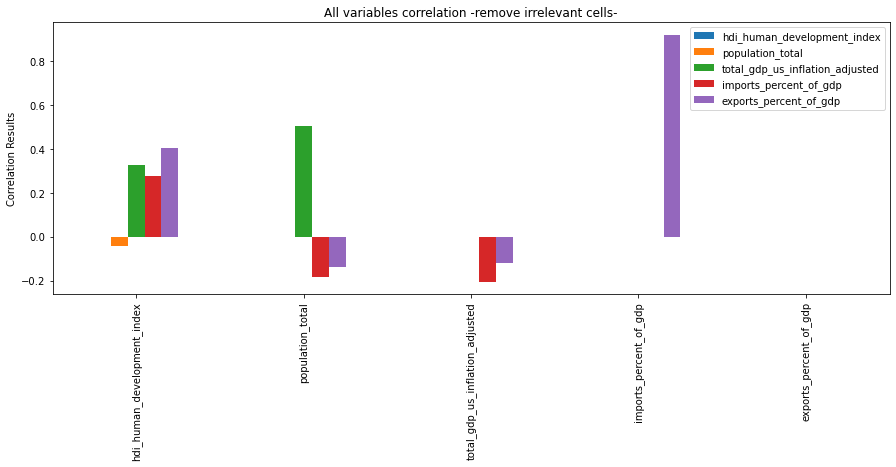

In [11]:
#how the Human development Index is correlated to all other measures
#take care that I put zeros on cells of irrelevant information to our visualization
#like diagonal cells and lower triangle of the correlation matrix
df_corr = df_clean.corr()
for i,col in enumerate(df_corr.columns):
            df_corr[col][i:len(col)+1]=0 #not to distract the visualization
df_corr.plot(kind="bar",figsize=(15,5),title="All variables correlation -remove irrelevant cells-",ylabel='Correlation Results')
df_corr.head()

From the table above it showed that the HDI is positively correlated with both GDP, imports and exports and negatively correlated to Population.
You can see the correlation with HDI in the far left part of the visualization. you can see the corr of population and how it is slightly negative and the rest of variables are positive.


### Research Question 2 For the positively correlated measure if any how this correlation is changed by country?

<AxesSubplot:title={'center':'population_total'}, xlabel='year'>

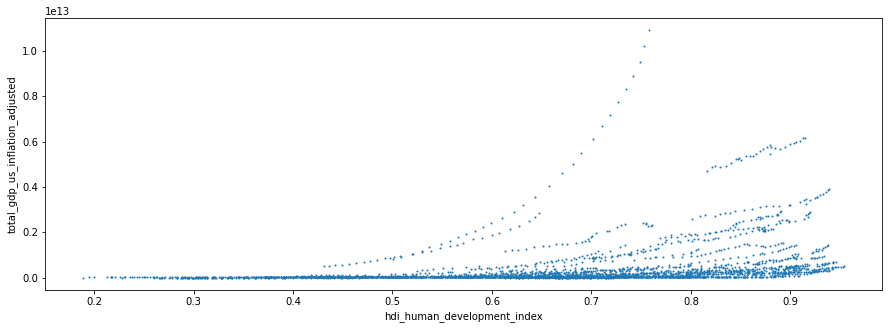

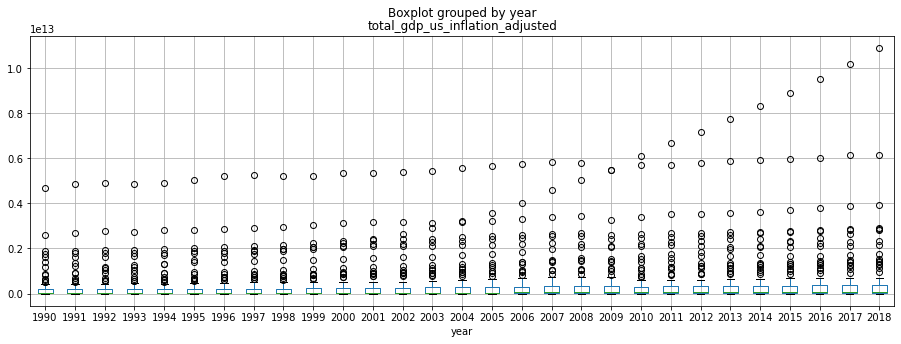

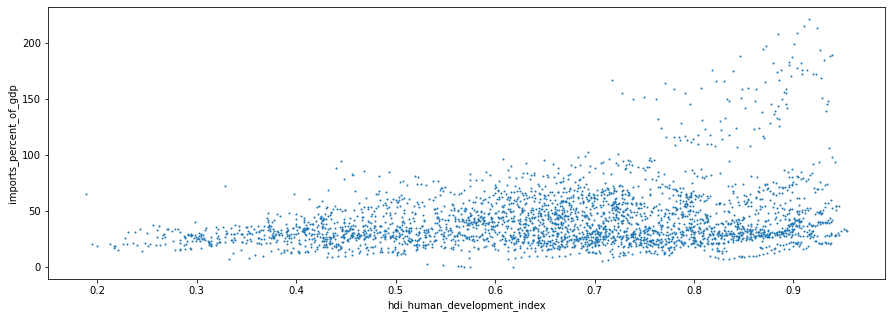

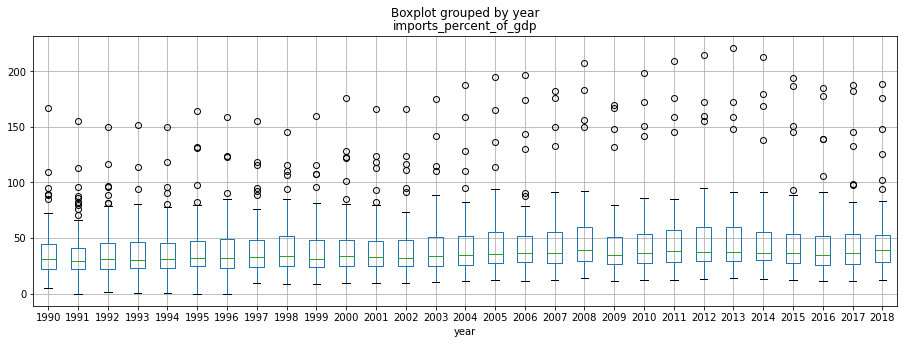

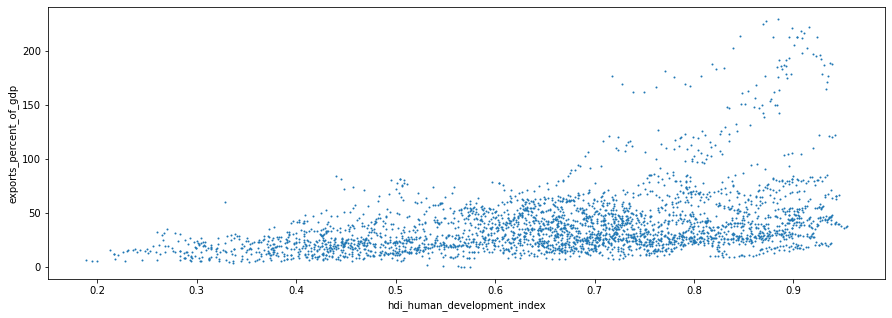

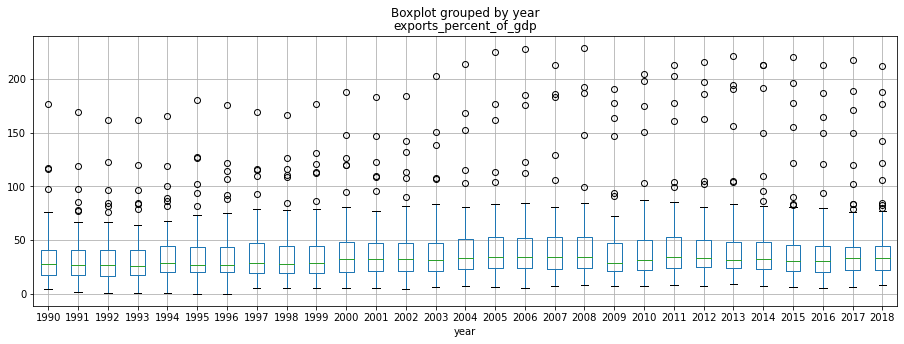

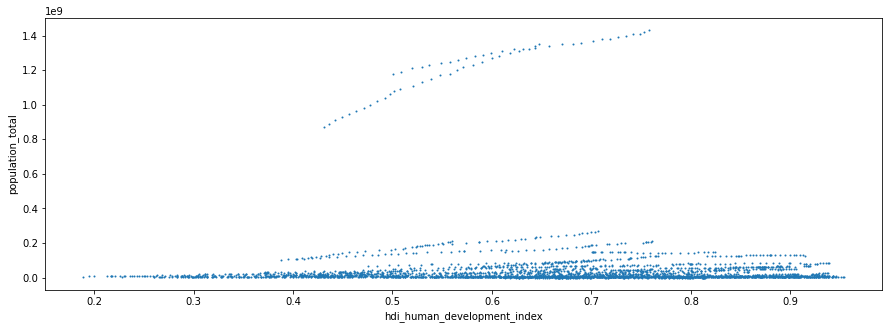

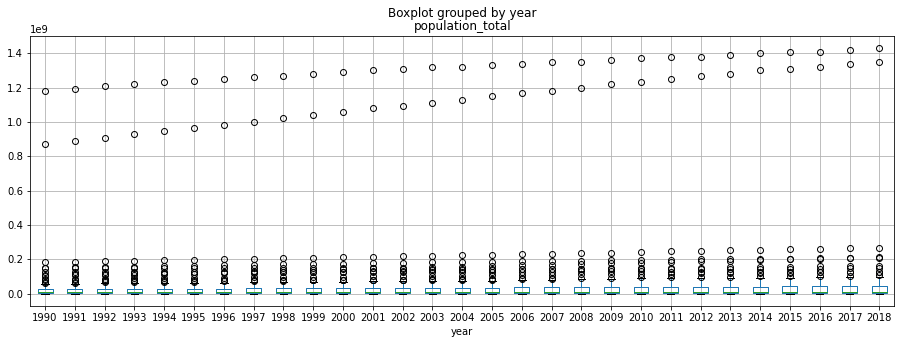

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_clean.plot('hdi_human_development_index','total_gdp_us_inflation_adjusted',kind='scatter',figsize=(15,5),s=1)
df_clean.boxplot(column='total_gdp_us_inflation_adjusted',by='year',figsize=(15,5))
df_clean.plot('hdi_human_development_index','imports_percent_of_gdp',kind='scatter',figsize=(15,5), s=1)
##sns.boxplot(x=df_clean.index,y=df_clean['hdi_human_development_index'],data=df_clean)
df_clean.boxplot(column='imports_percent_of_gdp',by='year',figsize=(15,5))
df_clean.plot('hdi_human_development_index','exports_percent_of_gdp',kind='scatter',figsize=(15,5),s=1)
df_clean.boxplot(column='exports_percent_of_gdp',by='year',figsize=(15,5))
# while population is negatively corroleated
df_clean.plot('hdi_human_development_index','population_total',kind='scatter',figsize=(15,5),s=1)
df_clean.boxplot(column='population_total',by='year',figsize=(15,5))

## Selected Countries Demo:
In the following I will demonstratethe same relations above but on top 10 countries of HDI index in 2018. Country by country. This will show for the selected countries how the coorolation is demonstrated on ta country level.

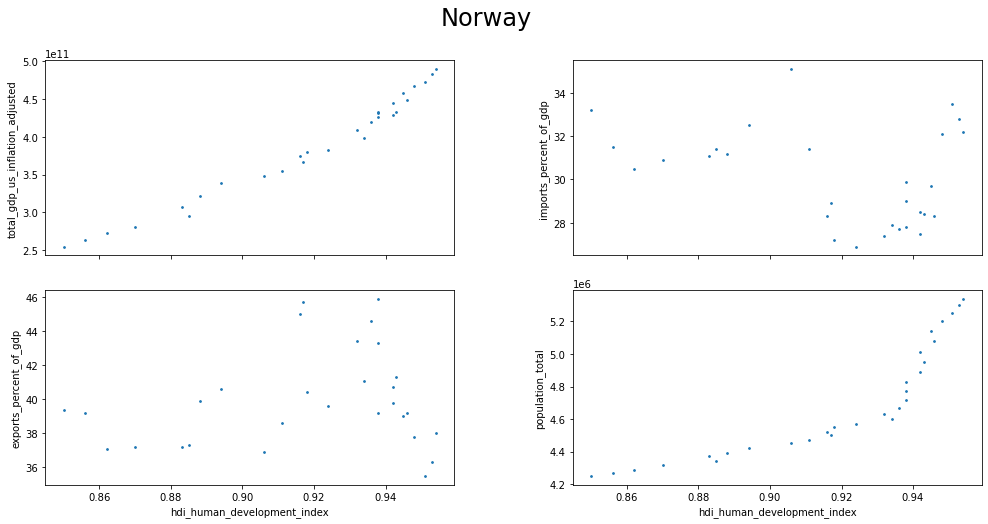

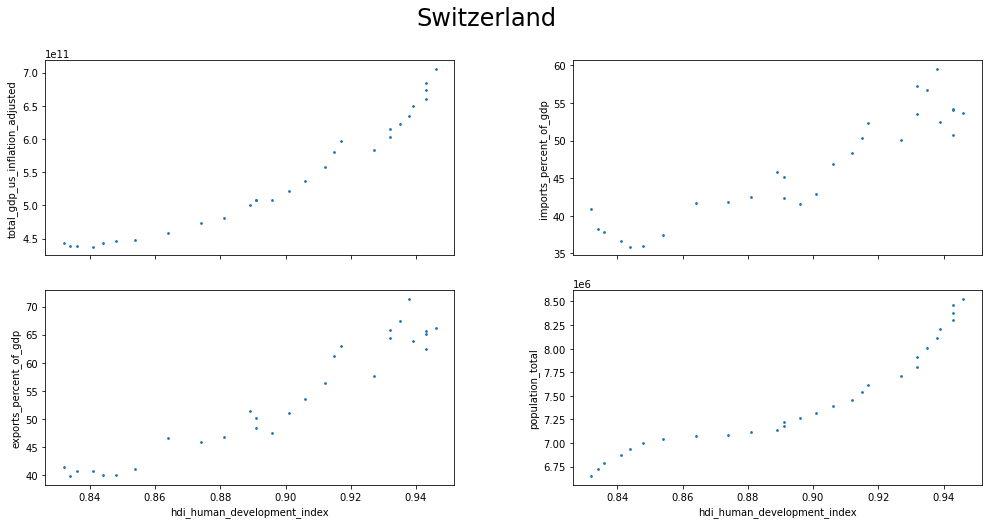

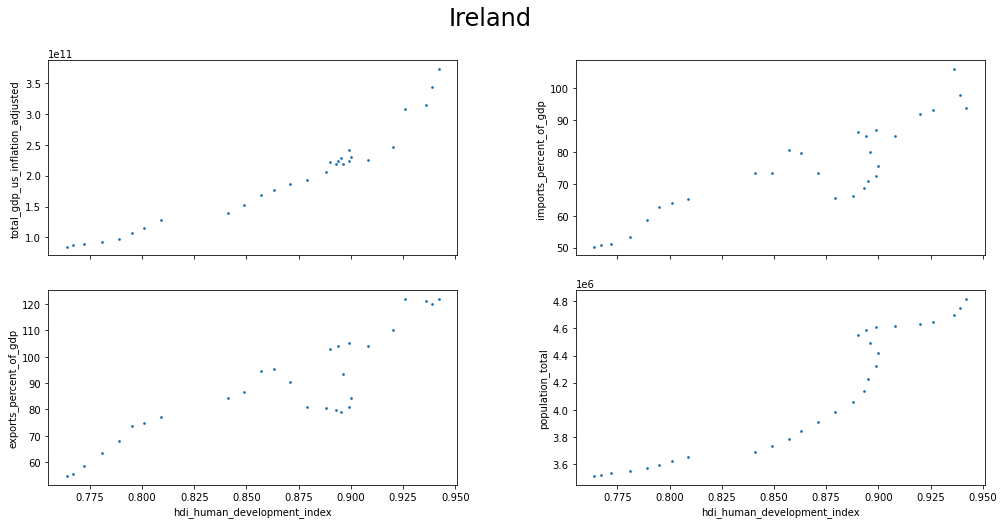

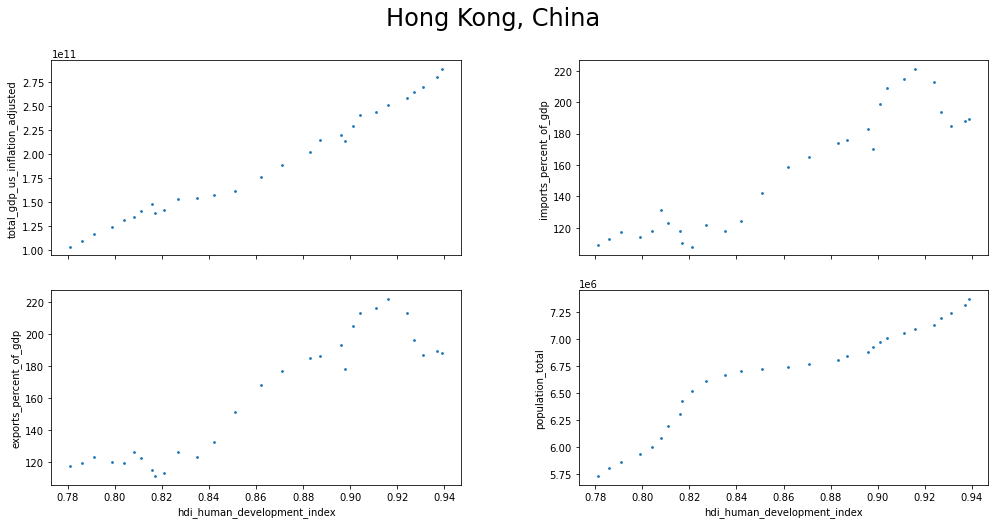

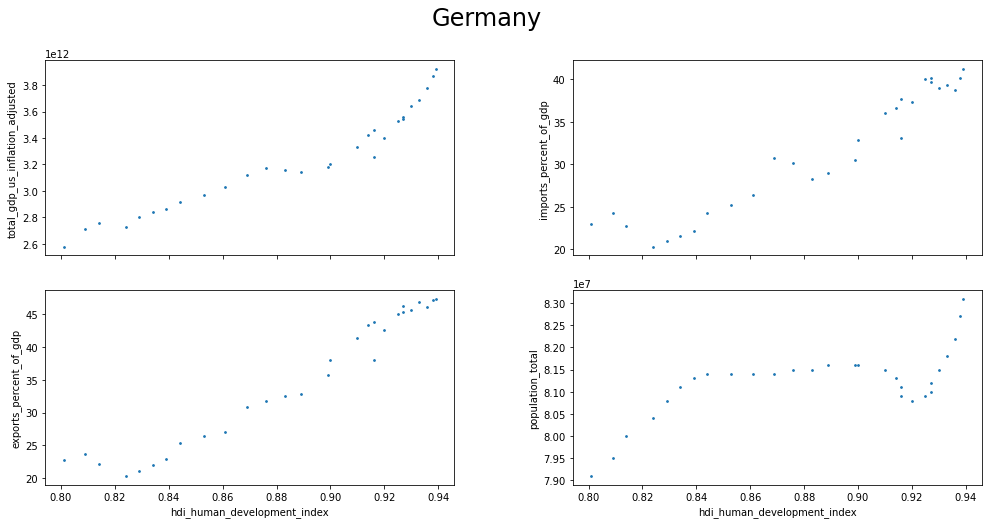

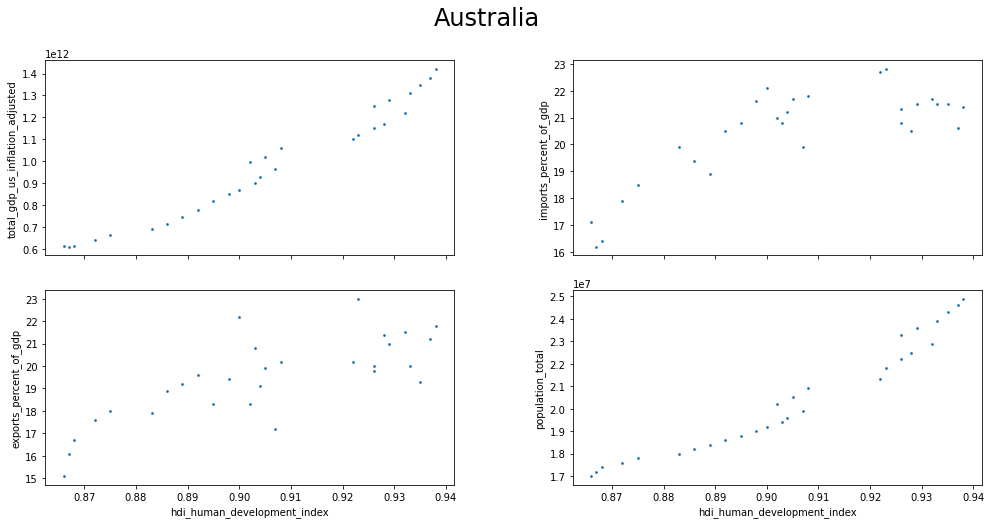

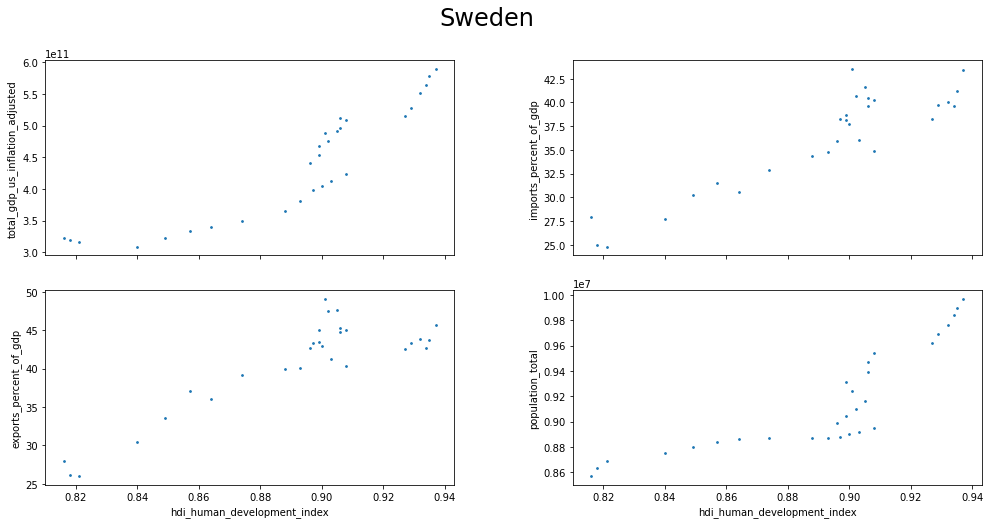

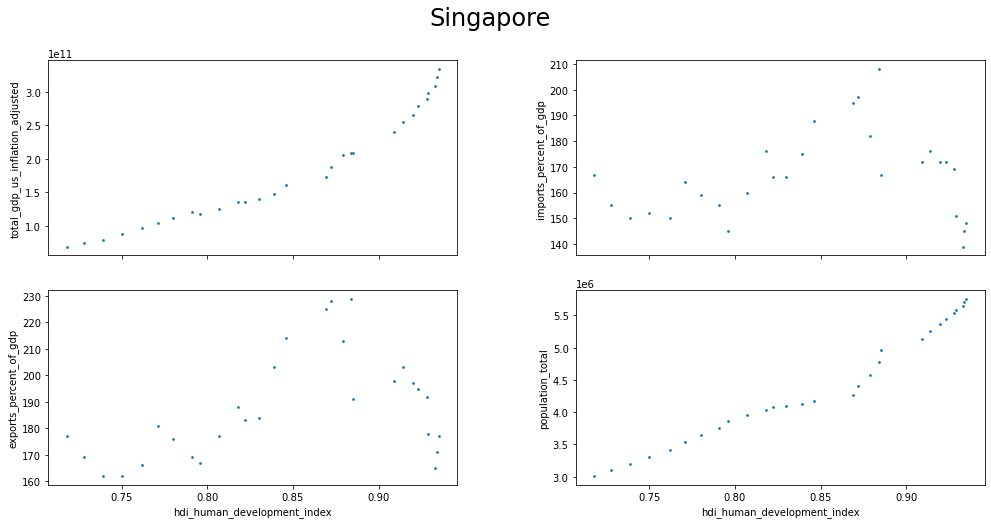

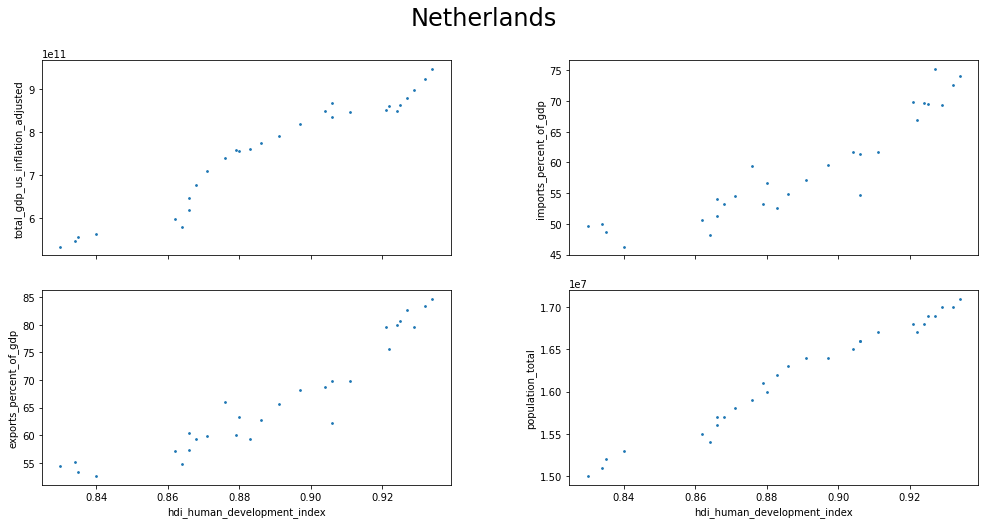

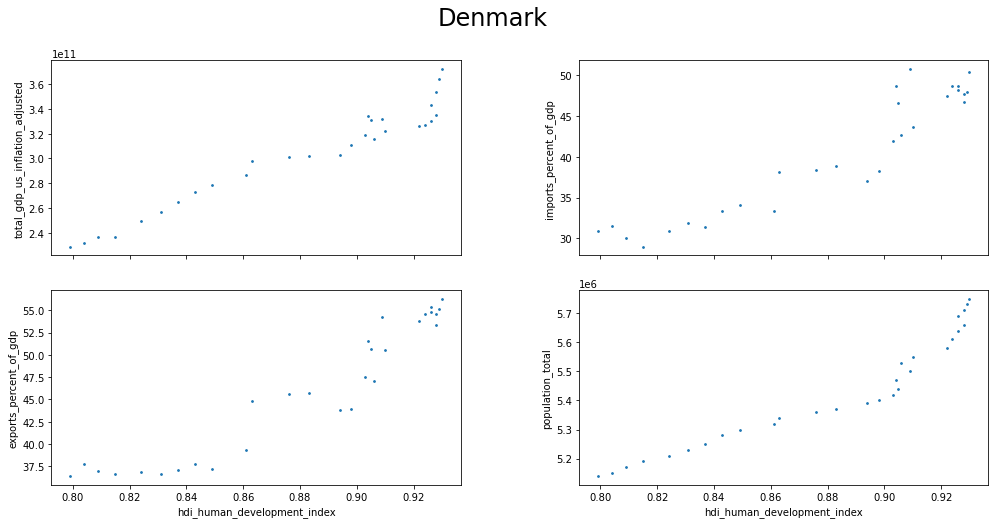

In [13]:
plt.tight_layout
for CNT,YER in df_clean.query('year == "2018"').sort_values('hdi_human_development_index',ascending=False).head(10).index:
    Country_DMO = "\"{}\"".format(CNT)
    df_clean.query('country == {}'.format(Country_DMO)).corr
    fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True)
    fig.tight_layout(pad=1.0)
    fig.suptitle(CNT,fontsize=24)
    df_clean.query('country == {}'.format(Country_DMO)).plot('hdi_human_development_index','total_gdp_us_inflation_adjusted',kind='scatter', figsize=(5,5),s=3,ax=axes[0,0])
    df_clean.query('country == {}'.format(Country_DMO)).plot('hdi_human_development_index','imports_percent_of_gdp',kind='scatter',figsize=(5,5), s=3, ax=axes[0,1])
    df_clean.query('country == {}'.format(Country_DMO)).plot('hdi_human_development_index','exports_percent_of_gdp',kind='scatter',figsize=(5,5),s=3, ax=axes[1,0])
    df_clean.query('country == {}'.format(Country_DMO)).plot('hdi_human_development_index','population_total',kind='scatter',figsize=(5,5),s=3, ax=axes[1,1])
    fig.set_size_inches(15,7.5)
    fig.subplots_adjust(top=0.88)
    plt.show()

<a id='conclusions'></a>
## Conclusions

From the above we found that HDI (Human Development Index) is positively correlated to the GDP, imports and Exports while it is negatively correlated to the population numbers.
From the top 10 countries demonstration we can also criticize that the population is negatively correlated with HDI.

###### One of the limitations that we have in this data exploration is the removal of countries with incomplete data. Around 71 countries (including USA, UAE) partial available data has been removed before deducing the correlation. This represent 71 of total 178 countries around 40% of the data. 
